# Hugging Face를 활용한 Modeling
Pytorch, Hugging Face Trainer를 사용하여 Model Fine-tuning과 Inference를 진행해보자

## EDA(Exploratory Data Analysis)
간단하게 Train, Test Dataset의 구조와 문장 분포를 확인해보았습니다.

### Import Package
데이터 확인을 위한 패키지 불러오기

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data
Data가 위치한 PATH에서 Data를 불러오기

In [5]:
PATH =  './data'

train = pd.read_csv(os.path.join(PATH, 'data_aug.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')

train.head(10)

,index,premise,hypothesis,label
0,0,흡연자분들은 발코니가 있는 방이면 발코니에서 흡연이 가능합니다.,어떤 방에서도 흡연은 금지됩니다.,contradiction
1,1,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기 불편함이 많았다.,contradiction
2,2,10명이 함께 사용하기 불편함없이 만족했다.,성인 10명이 함께 사용하기 불편함없이 없었다.,neutral
3,3,10명이 함께 사용하기 불편함없이 만족했다.,10명이 함께 사용하기에 만족스러웠다.,entailment
4,4,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요.,건물사람들은 수영장과 썬베드를 이용할 수 있습니다.,entailment
5,5,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요.,수영장과 썬베드는 9층에 있습니다.,contradiction
6,6,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요.,수영장과 썬베드는 유료입니다.,neutral
7,7,"11월 5일, 정부가 국무회의에서 통합진보당에 대한 해산심판 청구안을 통과시켰으며,...",법무부가 해산심판 청구안을 통과시킨 후 정부가 해산 청구서를 제출하였다.,contradiction
8,8,"11월 5일, 정부가 국무회의에서 통합진보당에 대한 해산심판 청구안을 통과시켰으며,...",법무부가 청구서를 제출한 3일 뒤에 통합진보당은 해산됐다.,neutral
9,9,"11월 5일, 정부가 국무회의에서 통합진보당에 대한 해산심판 청구안을 통과시켰으며,...",정부는 통합진보당의 해산에 동의하였다.,entailment


### Train, Test Data 확인

### 간단한 Test Preprocessing
전제, 가설에 존재하는 한글 단어가 아닌 다른 단어들은 전부 제거해줍니다.

In [6]:
train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

<ipython-input-6-2d3af709e460>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-6-2d3af709e460>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


,index,premise,hypothesis,label
0,0,흡연자분들은 발코니가 있는 방이면 발코니에서 흡연이 가능합니다,어떤 방에서도 흡연은 금지됩니다.,contradiction
1,1,10명이 함께 사용하기 불편함없이 만족했다,10명이 함께 사용하기 불편함이 많았다.,contradiction
2,2,10명이 함께 사용하기 불편함없이 만족했다,성인 10명이 함께 사용하기 불편함없이 없었다.,neutral
3,3,10명이 함께 사용하기 불편함없이 만족했다,10명이 함께 사용하기에 만족스러웠다.,entailment
4,4,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요,건물사람들은 수영장과 썬베드를 이용할 수 있습니다.,entailment


In [7]:
train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

<ipython-input-7-7d1dabf81269>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
<ipython-input-7-7d1dabf81269>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


,index,premise,hypothesis,label
0,0,흡연자분들은 발코니가 있는 방이면 발코니에서 흡연이 가능합니다,어떤 방에서도 흡연은 금지됩니다,contradiction
1,1,10명이 함께 사용하기 불편함없이 만족했다,10명이 함께 사용하기 불편함이 많았다,contradiction
2,2,10명이 함께 사용하기 불편함없이 만족했다,성인 10명이 함께 사용하기 불편함없이 없었다,neutral
3,3,10명이 함께 사용하기 불편함없이 만족했다,10명이 함께 사용하기에 만족스러웠다,entailment
4,4,10층에 건물사람들만 이용하는 수영장과 썬베드들이 있구요,건물사람들은 수영장과 썬베드를 이용할 수 있습니다,entailment


### Label 분포
Train Dataset의 Label 분포를 Bar Chart를 사용하여 시각화

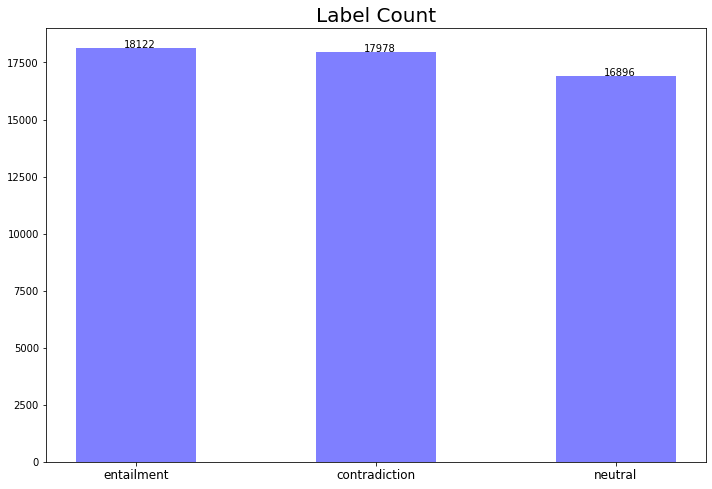

In [9]:
feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

### 전제, 가설 길이 확인
Train에 존재하는 Premise(전제), Hypothesis(가설)의 길이를 확인하고 이를 통해 Tokenizer의 max_length 설정이 가능

In [10]:
max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

Max Premise Length:  89
Min Premise Length:  18
Mean Premise Lenght:  44.19533549701864 

Max Hypothesis Length:  102
Min Hypothesis Length:  4
Mean Hypothesis Lenght:  23.914314287870784


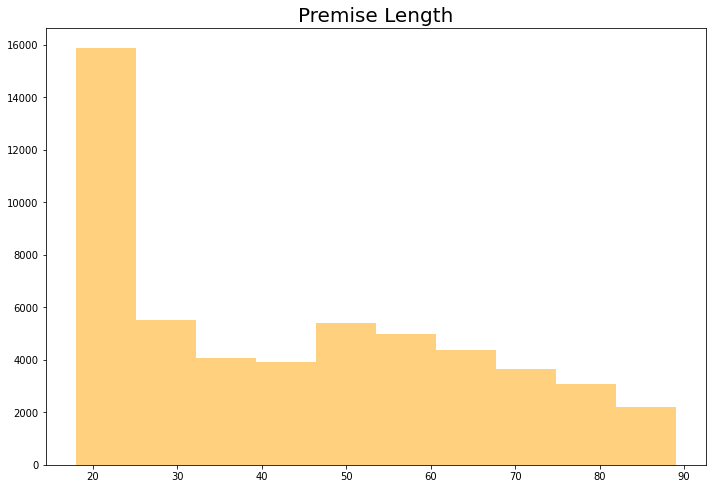

In [11]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

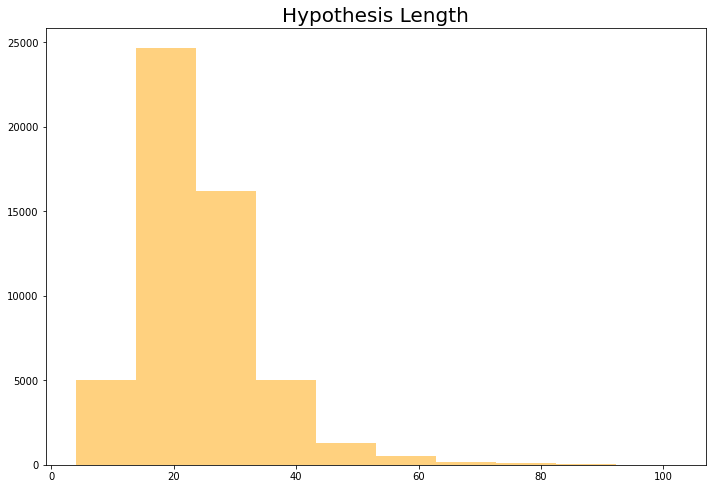

In [12]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Hypothesis Length', fontsize=20)

plt.hist(train['hypothesis'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

## Modeling

### Download transformers and Import Package

In [8]:
import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

### Seed 고정, GPU 설정

In [6]:
def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Load Tokenizer, Model
Hugging Face Hub에 존재하는 Pretrained Tokenizer와 Model 및 Model Config를 불러옵니다.

이 때, Classification은 num_labels가 2로 Default되어있기 때문에 Model Config의 Parameter를 변경해줍니다.

In [14]:
MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3
config.hidden_dropout_prob = 0.1
config.attention_probs_dropout_prob = 0.1
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifi

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

### Tokenizing
Train Data를 Train과 Validation Dataset으로 나누고 각각 데이터를 Tokenizer를 통해 Tokenizing을 합니다.  

Tokenizer에 들어가는 문장은 전제와 가설을 Concat한 문장이 됩니다.

In [15]:
def data_token(train, train_idx, eval_idx):
    train_premise, train_hypothesis = train['premise'][train_idx], train['hypothesis'][train_idx]
    eval_premise, eval_hypothesis = train['premise'][eval_idx], train['hypothesis'][eval_idx]

    tokenized_train = tokenizer(
        list(train_premise),
        list(train_hypothesis),
        return_tensors="pt",
        max_length=192, # Max_Length = 190
        padding=True,
        truncation=True,
        add_special_tokens=True
    )

    tokenized_eval = tokenizer(
        list(eval_premise),
        list(eval_hypothesis),
        return_tensors="pt",
        max_length=192,
        padding=True,
        truncation=True,
        add_special_tokens=True
    )
    
    return tokenized_train, tokenized_eval

사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현해야 함.  
```__init__```, ```__len__```, ```__getitem__```  
  
+ ```__init__``` : __init__ 함수는 Dataset 객체가 생성(instantiate)될 때 한 번만 실행함. 초기화작업
+ ```__len__``` : 데이터셋의 샘플 개수를 반환
+ ```__getitem__``` : 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환

In [16]:
class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)

Unlike copy_(), this function is recorded in the computation graph. Gradients propagating to the cloned tensor will propagate to the original tensor.  

copy_()와 달리 clone()은 computation graph에 기록됨. 복제된 텐서로 전파되는 그라디언트는 원래 텐서로 전파됨.

In [17]:
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer" : 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label

In [18]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [19]:
def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

In [17]:
def compute_metrics(pred):
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 5)
cv_accuracy = []

idx_iter = 0
#k_fold
for train_idx, eval_idx in skfold.split(train['premise'], train['label']):
    MODEL_NAME = 'klue/roberta-large'

    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

    config = AutoConfig.from_pretrained(MODEL_NAME)
    config.num_labels = 3
    config.hidden_dropout_prob = 0.1
    config.attention_probs_dropout_prob = 0.1
    model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)
    #print(train_idx, eval_idx)
    tokenized_train, tokenized_eval = data_token(train, train_idx, eval_idx)
    train_label, eval_label = label_to_num(train['label'][train_idx]), label_to_num(train['label'][eval_idx])
    
    train_dataset = BERTDataset(tokenized_train, train_label)
    eval_dataset = BERTDataset(tokenized_eval, eval_label)

    #저장할 경로
    dir = './roberta_k_fold_save/result_idx_' + str(idx_iter)
    
    training_ars = TrainingArguments(
        output_dir= dir,
        num_train_epochs=11,
        per_device_train_batch_size=32,
        save_total_limit=1000,
        save_steps=500,
        evaluation_strategy='steps',
        eval_steps = 500,
        load_best_model_at_end = True,
    )

    trainer = Trainer(
        model=model,
        args=training_ars,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics,
    )
    
    #학습
    trainer.train()
    model.save_pretrained('./roberta_kfold_best_model')
    
    
    idx_iter = idx_iter + 1
    


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

MODEL_NAME = './roberta_k_fold_save/result_idx_2' + '/checkpoint-5000'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)


dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)

pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()

import csv
# field names  
fields = ['entailment', 'contradiction', 'neutral'] 

# data rows of csv file for soft ensemble
with open('./proba/klue_roberta_2_5000.csv', 'w',newline='') as f: 
    
    write = csv.writer(f)      
    write.writerow(fields) 
    write.writerows(output_prob)
    
#answer = num_to_label(pred_answer)

#df = pd.DataFrame(answer, columns=['index', 'label'])

#save_dir = './data/submission_iter_'+ str(idx_iter) + '.csv'
#df.to_csv(save_dir, index=False)